# PROYECTO REFUERZO

## Jorge Vázquez

--------

### Exploratory Data Analysis

Se utilizaron varios enfoques de EDA y se regresó a este paso multiples veces debido a que los resultados de los modelos eran malos.

Finalmente y dado que los resultados no mejoraron, se tuvo que poner un límite al proceso de análisis exploratorio de datos para poder continuar con las otras fases del proyecto.

El EDA que finalmente utilice une PCA con correlación de las características respecto a la variable objetivo. Al final, este análisis concluye que no hay que eliminar características.

### Análisis de Componentes Principales PCA

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
df = pd.read_csv('dev/data/telecust1000t.csv')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Exclude the target variable 'custcat' from the features
features = df.drop(columns=['custcat']).columns

# Standardize the data excluding the target variable
scaled_data = scaler.fit_transform(df.drop(columns=['custcat']))

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Get the principal components
principal_components = pca.components_

# List the features identified as PCA
pca_features = pd.DataFrame(principal_components, columns=features)

print("Principal Component Analysis Features:")
print(pca_features)

Principal Component Analysis Features:
      region    tenure       age   marital   address    income        ed  \
0   0.027124  0.390336  0.493667 -0.046938  0.436790  0.270533 -0.133256   
1  -0.135935  0.238601  0.012564  0.697244  0.037353  0.045162 -0.025407   
2  -0.029830  0.028389 -0.061271 -0.068562 -0.076318  0.660145  0.533595   
3   0.685614  0.003758 -0.081715  0.018071 -0.085109  0.076055 -0.162254   
4  -0.494585 -0.052248  0.041824 -0.004859  0.040975 -0.092979  0.422369   
5   0.511120  0.082633  0.101899  0.127155  0.158859 -0.168605  0.652695   
6   0.050113 -0.503582  0.082105  0.016771 -0.416124  0.372611 -0.041534   
7  -0.022698  0.680953 -0.287470 -0.163442 -0.573498 -0.084402  0.068184   
8  -0.021299  0.102589 -0.346916 -0.541801  0.387299  0.219254 -0.073172   
9   0.013895 -0.141855  0.314044 -0.367211 -0.088016 -0.475934  0.209552   
10 -0.017290  0.179971  0.652086 -0.187195 -0.328679  0.159922 -0.102467   

      employ    retire    gender    reside  
0  

### Listado de características por Componente Principal

El Threshold se estableció en |0.3| aunque otro threshold utilizado comunmente es |0.4|
Valores por debajo del threshold contribuyen debilmente al componente.

In [10]:
# Set threshold
THRESHOLD = 0.3

# Create mask for significant loadings
significant_loadings = np.abs(pca_features) >= THRESHOLD

# Print significant features for each PC
for pc_idx in range(len(pca_features)):
    print(f"\nPrincipal Component {pc_idx + 1} significant features:")
    significant_features = features[significant_loadings.iloc[pc_idx]]
    significant_values = pca_features.iloc[pc_idx][significant_loadings.iloc[pc_idx]]
    for feat, val in zip(significant_features, significant_values):
        print(f"{feat}: {val:.3f}")


Principal Component 1 significant features:
tenure: 0.390
age: 0.494
address: 0.437
employ: 0.467

Principal Component 2 significant features:
marital: 0.697
reside: 0.645

Principal Component 3 significant features:
income: 0.660
ed: 0.534
retire: -0.493

Principal Component 4 significant features:
region: 0.686
gender: 0.687

Principal Component 5 significant features:
region: -0.495
ed: 0.422
retire: 0.367
gender: 0.649

Principal Component 6 significant features:
region: 0.511
ed: 0.653
retire: 0.324

Principal Component 7 significant features:
tenure: -0.504
address: -0.416
income: 0.373
retire: 0.519

Principal Component 8 significant features:
tenure: 0.681
address: -0.573

Principal Component 9 significant features:
age: -0.347
marital: -0.542
address: 0.387
reside: 0.560

Principal Component 10 significant features:
age: 0.314
marital: -0.367
income: -0.476
employ: 0.482
retire: -0.308
reside: 0.376

Principal Component 11 significant features:
age: 0.652
address: -0.329
empl

### Resumen de características identificadas como útiles por el PCA

Básicamente todas las características pueden considerarse útiles desde la perspectiva del PCA aunque su presencia en los diferentes componentes fluctúa.

Las más útiles son:
address (5)
age (4)

La menos útil es:
gender (2)

Si alguna feature sólo hubiera sido relevante en 1 PC, habría sido útil descartarla.


In [11]:
# Set threshold
THRESHOLD = 0.3

# Count significant appearances for each feature
significant_counts = (np.abs(pca_features) >= THRESHOLD).sum()

print("Number of times each feature appears significantly (|loading| >= 0.3):")
print(significant_counts)

# Identify features with low significance
low_significance = significant_counts[significant_counts <= 1].index.tolist()
print("\nFeatures with low significance (appear significantly <= 1 times):")
print(low_significance)

Number of times each feature appears significantly (|loading| >= 0.3):
region     3
tenure     3
age        4
marital    3
address    5
income     3
ed         3
employ     3
retire     5
gender     2
reside     3
dtype: int64

Features with low significance (appear significantly <= 1 times):
[]


### Análisis de Correlación y unión de este análisis con PCA para definir "finalistas"

Spoiler: Aunque el aporte de algunas características es mínimo, eliminarlas reduce la métrica baseline por lo que se determino no eliminar ninguna feature pero al menos se hizo después de un análisis extenso del dataset.

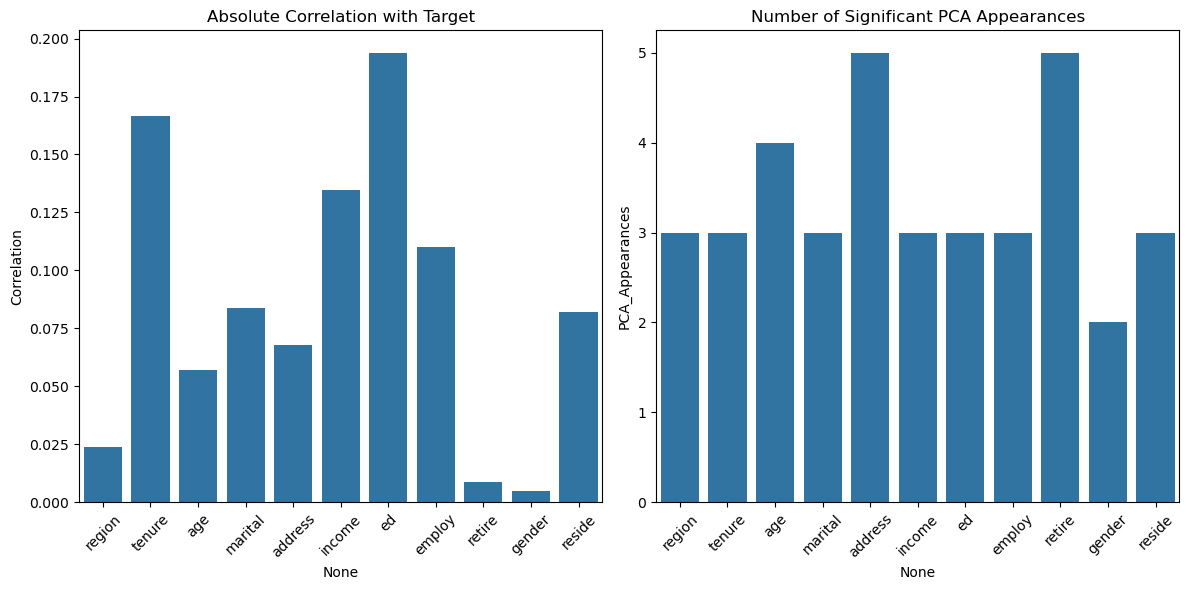


Feature Analysis Summary:
         Correlation  PCA_Appearances
ed          0.193864                3
tenure      0.166691                3
income      0.134525                3
employ      0.110011                3
marital     0.083836                3
reside      0.082022                3
address     0.067913                5
age         0.056909                4
region      0.023771                3
retire      0.008908                5
gender      0.004966                2

Recommended features to keep:
['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Correlation Analysis
def analyze_features(df, target='custcat', pca_features=pca_features, threshold_pca=0.3, threshold_corr=0.1):
    # Calculate correlations
    correlations = df.corr()[target].drop(target)
    
    # Count significant PCA loadings
    pca_significance = (np.abs(pca_features) >= threshold_pca).sum()
    
    # Combine metrics
    feature_analysis = pd.DataFrame({
        'Correlation': correlations.abs(),
        'PCA_Appearances': pca_significance
    })
    
    # Plot
    plt.figure(figsize=(12, 6))
    
    # Correlation plot
    plt.subplot(1, 2, 1)
    sns.barplot(x=feature_analysis.index, 
                y='Correlation', 
                data=feature_analysis)
    plt.xticks(rotation=45)
    plt.title('Absolute Correlation with Target')
    
    # PCA significance plot
    plt.subplot(1, 2, 2)
    sns.barplot(x=feature_analysis.index, 
                y='PCA_Appearances', 
                data=feature_analysis)
    plt.xticks(rotation=45)
    plt.title('Number of Significant PCA Appearances')
    
    plt.tight_layout()
    plt.show()
    
    # Feature selection recommendation
    important_features = feature_analysis[
        (feature_analysis['Correlation'] >= threshold_corr) | 
        (feature_analysis['PCA_Appearances'] >= 2)
    ].index.tolist()
    
    print("\nFeature Analysis Summary:")
    print(feature_analysis.sort_values('Correlation', ascending=False))
    print("\nRecommended features to keep:")
    print(important_features)
    
    return important_features

# Run analysis
important_features = analyze_features(df)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


### Función de comparación de modelos

Básicamente esta función prepara las muestras de train y test tanto sin reducción de características como con reducción aunque la decisión fue no eliminar ninguna feature así que el accuracy del modelo completo y del modelo "reducido" son iguales.

In [13]:
# Compare performances
def compare_models(X, X_reduced, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_red_train, X_red_test = X_reduced.loc[X_train.index], X_reduced.loc[X_test.index]
    
    # Full model
    model_full = LogisticRegression()
    model_full.fit(X_train, y_train)
    acc_full = accuracy_score(y_test, model_full.predict(X_test))
    
    # Reduced model
    model_red = LogisticRegression()
    model_red.fit(X_red_train, y_train)
    acc_red = accuracy_score(y_test, model_red.predict(X_red_test))
    
    print(f"Full model accuracy: {acc_full:.4f}")
    print(f"Reduced model accuracy: {acc_red:.4f}")

### Ejecución del modelo básico para comparación de versión completa de features contra la versión reducida.

In [14]:
# Baseline model (all features)
X = df.drop('custcat', axis=1)
y = df['custcat']

# Create model with selected features
X_selected = df[important_features]
y = df['custcat']

# Compare performance
compare_models(X, X_selected, y)

Full model accuracy: 0.4200
Reduced model accuracy: 0.4200


c:\Users\jvazq\Data_Analysis_Tools\anaconda3\envs\ml_refuerzo\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jvazq\Data_Analysis_Tools\anaconda3\envs\ml_refuerzo\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Nota: Estos warnings fueron ignorados porque solo se buscaba una comparación de features.

### Generación de datos sintéticos para probar modelos

In [19]:
import pandas as pd
import numpy as np

# Read original data to get structure
df = pd.read_csv('dev/data/telecust1000t.csv')

# Create test data without 'custcat'
test_data = df.drop('custcat', axis=1).copy()

# Convert 'retire' column to int64
df['retire'] = df['retire'].astype('int64')

# Optional: Generate more synthetic records
def generate_synthetic_records(base_df, n_records=100):
    synthetic_data = pd.DataFrame()
    
    for column in base_df.columns:
        min_val = base_df[column].min()
        max_val = base_df[column].max()
        
        if base_df[column].dtype in ['int64', 'float64']:
            # For numeric columns
            synthetic_data[column] = np.random.uniform(min_val, max_val, n_records)
            
            # Round to match original data type
            if base_df[column].dtype == 'int64':
                synthetic_data[column] = synthetic_data[column].round().astype(int)
            if base_df[column].dtype == 'float64':
                synthetic_data[column] = synthetic_data[column].round().astype(float)
        else:
            # For categorical columns
            synthetic_data[column] = np.random.choice(base_df[column].unique(), n_records)
    
    return synthetic_data

# Generate synthetic test data
test_data_synthetic = generate_synthetic_records(test_data, n_records=200)

# Save to CSV
test_data_synthetic.to_csv('dev/data/test_data_nocustcat.csv', index=False)

print("Test data shape:", test_data_synthetic.shape)
print("\nTest data preview:")
print(test_data_synthetic.head())
print("\nData types:")
print(test_data_synthetic.dtypes)

Test data shape: (200, 11)

Test data preview:
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      50   36        1       48  1268.0   1      30     1.0       1   
1       2      12   37        0       21  1124.0   1      15     1.0       1   
2       2      43   19        1       12   902.0   3      20     1.0       1   
3       1      52   53        1        3   151.0   3      27     0.0       0   
4       2      10   21        1        4  1557.0   4      37     0.0       0   

   reside  
0       4  
1       4  
2       1  
3       1  
4       2  

Data types:
region       int32
tenure       int32
age          int32
marital      int32
address      int32
income     float64
ed           int32
employ       int32
retire     float64
gender       int32
reside       int32
dtype: object
